In [1]:
import sys 
#sys.path.append("codes/modules") # add custom Vibe 's modules
#sys.path.append("../..") # add standard 's modules
# sys.path.append('/home/hbkoziel/pyfesom/codes/modules')
sys.path.append('../..') # add standard 's modules
sys.path.append('../modules')

import pyfesom as pf
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset
import os
import time
import pandas as pd
import xarray as xr

sys.path.append('/home/hbkoziel/pyfesom/pyfesom/cmocean/')
import cmocean as cmap

No joblib
no cmocean


In [6]:
# PLOT CONFIGURATION #

# choose date
first_year = 1980
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)
months =np.linspace(0,11,12).astype(int)
print years
print months
# choose depth
########################

# DEFINITION OF PATHS
mesh_id    = 'meshArc4.5'
runid	= 'Arc12'
resultpath = '/scratch/usr/hbkvsk12/hlrn3_work2/results/'+runid+'/'
meshpath   = '/scratch/usr/hbkoziel/mesh/'+mesh_id+'/'     
outputpath = '/scratch/usr/hbkoziel/Arc12/pybins/'
var_id = 'tr01'

[1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015]
[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [4]:
mesh = pf.load_mesh(meshpath, usepickle=True, get3d=False)             # Loading mesh, stores it in mesh.****  

/scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh
2
The usepickle == True)
The pickle file for python 2 exists.
The mesh will be loaded from /scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh


In [1]:
# lon_start = -20
# lat_start = 80
# lon_end   = 20
# lat_end   = 80
# plt.figure(figsize=(10,10))
# pf.plot_transect_map(lon_start, lat_start, lon_end, lat_end, 
#                        mesh, npoints=30, view = 'np', stock_img=False)

In [2]:
# lon_start = 20
# lat_start = 80
# lon_end   = 100
# lat_end   = 80
# plt.figure(figsize=(10,10))
# pf.plot_transect_map(lon_start, lat_start, lon_end, lat_end, 
#                        mesh, npoints=30, view = 'np', stock_img=False)

In [3]:
# lon_start = 100
# lat_start = 80
# lon_end   = 150
# lat_end   = 75
# plt.figure(figsize=(10,10))
# pf.plot_transect_map(lon_start, lat_start, lon_end, lat_end, 
#                        mesh, npoints=30, view = 'np', stock_img=False)

In [4]:
# lon_start = 150
# lat_start = 75
# lon_end   = -45
# lat_end   = 80
# plt.figure(figsize=(10,10))
# pf.plot_transect_map(lon_start, lat_start, lon_end, lat_end, 
#                        mesh, npoints=60, view = 'np', stock_img=False)

In [7]:
DATA = np.empty((21, 80))
#DATA[:]=np.nan
#DATA = []
lon_start = 20
lat_start = 69.5
lon_end   = 20
lat_end   = 75
npoints = 80
lonlat = pf.transect_get_lonlat(lon_start, lat_start, lon_end, lat_end, npoints=npoints)
dist   = pf.transect_get_distance(lonlat) # get's distances between starting point and present point
nodes  = pf.transect_get_nodes(lonlat, mesh)
dist   = pf.transect_get_distance(lonlat)
profile = pf.transect_get_profile(nodes, mesh)

for year in years:
    print year
    ncfile = resultpath+runid+'.'+str(year)+'.oce.mean.nc'
    f      = Dataset(ncfile, 'r')
    for mo in months:

        if mo ==0: 
            dayind = (range(0,15))
            month='JAN'
        if mo ==1: 
            dayind = (range(15,30))
            month='FEV'
        if mo ==2: 
            dayind = (range(30,45))
            month='MAR'
        if mo ==3: 
            dayind = (range(45,60))
            month='APR'
        elif mo ==4: 
            dayind = (range(60,75))
            month='MAY'
        elif mo ==5: 
            dayind = (range(75,90))
            month='JUN'
        elif mo ==6: 
            dayind = (range(90,105))
            month='JUL'
        elif mo ==7:
            dayind = (range(105,120))
            month='AUG'
        elif mo ==8: 
            dayind = (range(120,135))
            month='SEP'
        elif mo ==9: 
            dayind = (range(135,150))
            month='OCT'
        elif mo ==10: 
            dayind = (range(150,165))
            month='NOV'
        elif mo ==11: 
            dayind = (range(165,167))
            month='DEC'
        #print month
        #print 'loading variable from netcdf file...'
        if year<2000:
            data    = f.variables[var_id][mo,:]
        else:
            data    = f.variables[var_id][dayind,:].mean(axis=0)
        
        #print 'loading section data...'
        
        section = pf.transect_get_data(data, profile)
        #print 'concatenation...'
        #DATA[i,:,:] = DATA[i,:,:] + section[:,0:21]
        #DATA = np.append(DATA, section[:,0:21], axis=2)
        #DATA.append(section[:,0:21])
        DATA = np.dstack([DATA,section[:,:21].T])

1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015


In [34]:
print DATA.shape
print section.shape
depth = mesh.zlevs[0:21]
print depth.shape
print lonlat.shape

(21, 80, 433)
(80, 47)
(21,)
(80, 2)


In [35]:
DATA[DATA>33]=np.nan

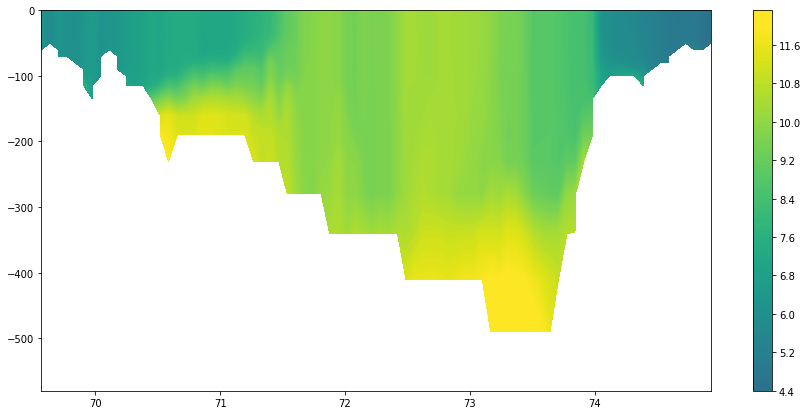

In [43]:
fig, ax = plt.subplots(1,1, figsize=(15,7))
p = ax.contourf(lonlat[:,1],-depth,DATA[:,:,1],100,vmin=0,vmax=12)
fig.colorbar(p, ax=ax)

In [38]:
DATA2 = DATA[:,:,1:]

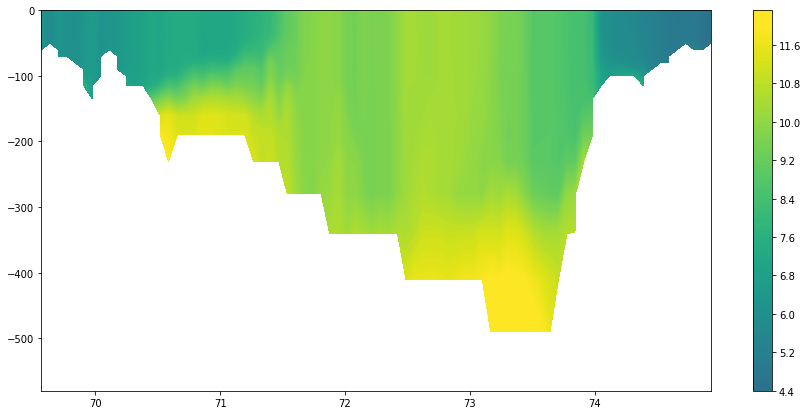

In [42]:
fig, ax = plt.subplots(1,1, figsize=(15,7))
p = ax.contourf(lonlat[:,1],-depth,DATA2[:,:,0],100,vmin=0,vmax=12)
fig.colorbar(p, ax=ax)

In [39]:
outfile = outputpath+'BSO_DIN.npy'
np.save(outfile, DATA2.data, allow_pickle=True, fix_imports=True)

In [40]:
outfile = outputpath+'BSOdepth.npy'
np.save(outfile, depth, allow_pickle=True, fix_imports=True)

In [41]:
outfile = outputpath+'BSOlonlat.npy'
np.save(outfile, lonlat, allow_pickle=True, fix_imports=True)